In [32]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
%matplotlib inline

In [33]:
df=pd.read_csv("iiit.csv")  
df

,College,Branch,Quota,Type,Gender,Opening Rank,Closing Rank,Rank,Chances
0,Atal Bihari Vajpayee Indian Institute of Infor...,"Computer Science and Engineering (4 Years, Bac...",AI,OPEN,Female-only (including Supernumerary),7551,11475,513,0.955294
1,Atal Bihari Vajpayee Indian Institute of Infor...,Integrated B. Tech.(IT) and M. Tech (IT) (5 Ye...,AI,OPEN,Gender-Neutral,8268,12315,1234,0.899797
2,Atal Bihari Vajpayee Indian Institute of Infor...,Integrated B. Tech.(IT) and M. Tech (IT) (5 Ye...,AI,OPEN,Female-only (including Supernumerary),15153,19933,3123,0.843325
3,Atal Bihari Vajpayee Indian Institute of Infor...,"Integrated B. Tech.(IT) and MBA (5 Years, Inte...",AI,OPEN,Gender-Neutral,12037,15545,2537,0.836796
4,Atal Bihari Vajpayee Indian Institute of Infor...,"Integrated B. Tech.(IT) and MBA (5 Years, Inte...",AI,OPEN,Female-only (including Supernumerary),20871,22746,4719,0.792535
...,...,...,...,...,...,...,...,...,...
1520,Indian Institute of Information Technology Bha...,"Mechatronics Engineering (4 Years, Bachelor of...",AI,OPEN,Gender-Neutral,30282,42443,626,0.985251
1521,Atal Bihari Vajpayee Indian Institute of Infor...,Integrated B. Tech.(IT) and M. Tech (IT) (5 Ye...,AI,OPEN,Gender-Neutral,10024,14469,210,0.985486
1522,"Indian Institute of Information Technology, De...",B. Tech. Mechanical Engineering and M. Tech. i...,AI,OPEN,Gender-Neutral,12338,32521,469,0.985579
1523,"Indian Institute of Information Technology, De...",B. Tech. Electronics and Communication Enginee...,AI,OPEN,Gender-Neutral,19516,24326,162,0.993340


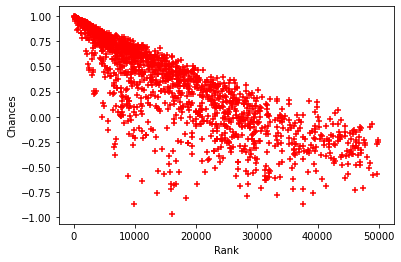

In [34]:
%matplotlib inline
plt.xlabel('Rank')
plt.ylabel('Chances')
plt.scatter(df.Rank,df.Chances,color='red',marker='+')

In [35]:
dv=df.drop(['Opening Rank','Closing Rank','Quota'],axis='columns')
dv

,College,Branch,Type,Gender,Rank,Chances
0,Atal Bihari Vajpayee Indian Institute of Infor...,"Computer Science and Engineering (4 Years, Bac...",OPEN,Female-only (including Supernumerary),513,0.955294
1,Atal Bihari Vajpayee Indian Institute of Infor...,Integrated B. Tech.(IT) and M. Tech (IT) (5 Ye...,OPEN,Gender-Neutral,1234,0.899797
2,Atal Bihari Vajpayee Indian Institute of Infor...,Integrated B. Tech.(IT) and M. Tech (IT) (5 Ye...,OPEN,Female-only (including Supernumerary),3123,0.843325
3,Atal Bihari Vajpayee Indian Institute of Infor...,"Integrated B. Tech.(IT) and MBA (5 Years, Inte...",OPEN,Gender-Neutral,2537,0.836796
4,Atal Bihari Vajpayee Indian Institute of Infor...,"Integrated B. Tech.(IT) and MBA (5 Years, Inte...",OPEN,Female-only (including Supernumerary),4719,0.792535
...,...,...,...,...,...,...
1520,Indian Institute of Information Technology Bha...,"Mechatronics Engineering (4 Years, Bachelor of...",OPEN,Gender-Neutral,626,0.985251
1521,Atal Bihari Vajpayee Indian Institute of Infor...,Integrated B. Tech.(IT) and M. Tech (IT) (5 Ye...,OPEN,Gender-Neutral,210,0.985486
1522,"Indian Institute of Information Technology, De...",B. Tech. Mechanical Engineering and M. Tech. i...,OPEN,Gender-Neutral,469,0.985579
1523,"Indian Institute of Information Technology, De...",B. Tech. Electronics and Communication Enginee...,OPEN,Gender-Neutral,162,0.993340


In [36]:
dumm=pd.get_dummies(df.College)
dumm

,Atal Bihari Vajpayee Indian Institute of Information Technology & Management Gwalior,Indian Institute of Information Technology (IIIT) Nagpur,Indian Institute of Information Technology (IIIT) Pune,Indian Institute of Information Technology (IIIT) Ranchi,"Indian Institute of Information Technology (IIIT), Sri City, Chittoor","Indian Institute of Information Technology (IIIT)Kota, Rajasthan",Indian Institute of Information Technology Bhagalpur,Indian Institute of Information Technology Bhopal,"Indian Institute of Information Technology Design & Manufacturing Kurnool, Andhra Pradesh",Indian Institute of Information Technology Guwahati,Indian Institute of Information Technology Lucknow,Indian Institute of Information Technology Manipur,"Indian Institute of Information Technology Srirangam, Tiruchirappalli",Indian Institute of Information Technology Surat,Indian Institute of Information Technology(IIIT) Dharwad,"Indian Institute of Information Technology(IIIT) Kalyani, West Bengal","Indian Institute of Information Technology(IIIT) Kilohrad, Sonepat, Haryana",Indian Institute of Information Technology(IIIT) Kottayam,"Indian Institute of Information Technology(IIIT) Una, Himachal Pradesh","Indian Institute of Information Technology(IIIT), Vadodara, Gujrat","Indian Institute of Information Technology, Agartala","Indian Institute of Information Technology, Allahabad","Indian Institute of Information Technology, Design & Manufacturing, Kancheepuram","Indian Institute of Information Technology, Vadodara International Campus Diu (IIITVICD)","Indian institute of information technology, Raichur, Karnataka","Pt. Dwarka Prasad Mishra Indian Institute of Information Technology, Design & Manufacture Jabalpur"
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1520,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1521,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1522,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1523,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [37]:
dummies=pd.get_dummies(df.Branch)
dummies

,"Artificial Intelligence and Data Science (4 Years, Bachelor of Technology)","B. Tech. Computer Science and Engineering and M. Tech. Computer Science and Engineering with specialization in Systems Design (5 Years, Bachelor and Master of Technology (Dual Degree))","B. Tech. Electronics and Communication Engineering and M. Tech. Electronics and Communication Engineering with specialization in Communication Systems Design (5 Years, Bachelor and Master of Technology (Dual Degree))","B. Tech. Electronics and Communication Engineering and M. Tech. Electronics and Communication Engineering with specialization in VLSI Design (5 Years, Bachelor and Master of Technology (Dual Degree))","B. Tech. Mechanical Engineering and M. Tech. Mechanical Engineering with specialization in Advanced Manufacturing (5 Years, Bachelor and Master of Technology (Dual Degree))","B. Tech. Mechanical Engineering and M. Tech. in Mechanical Engineering with specialization in Product Design (5 Years, Bachelor and Master of Technology (Dual Degree))","Computer Engineering (4 Years, Bachelor of Technology)","Computer Science (4 Years, Bachelor of Technology)","Computer Science and Artificial Intelligence (4 Years, Bachelor of Technology)","Computer Science and Engineering (4 Years, Bachelor of Technology)","Computer Science and Engineering (5 Years, Bachelor and Master of Technology (Dual Degree))","Data Science and Artificial Intelligence (4 Years, Bachelor of Technology)","Electronics and Communication Engineering (4 Years, Bachelor of Technology)","Electronics and Communication Engineering with specialization in Design and Manufacturing (4 Years, Bachelor of Technology)","Information Technology (4 Years, Bachelor of Technology)","Information Technology-Business Informatics (4 Years, Bachelor of Technology)","Integrated B. Tech.(IT) and M. Tech (IT) (5 Years, Integrated B. Tech. and M. Tech. /MBA)","Integrated B. Tech.(IT) and MBA (5 Years, Integrated B. Tech. and M. Tech. /MBA)","Mechanical Engineering (4 Years, Bachelor of Technology)","Mechanical Engineering with specialization in Design and Manufacturing (4 Years, Bachelor of Technology)","Mechanical Engineering with specialization in Smart Manufacturing (4 Years, Bachelor of Technology)","Mechatronics Engineering (4 Years, Bachelor of Technology)","Smart Manufacturing (4 Years, Bachelor of Technology)"
0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1520,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1521,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1522,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1523,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [38]:
dummies1=pd.get_dummies(df.Type)

In [39]:
dummies2=pd.get_dummies(df.Gender)

In [40]:
merged =pd.concat([dv,dummies,dumm,dummies1,dummies2],axis='columns')
merged

,College,Branch,Type,Gender,Rank,Chances,"Artificial Intelligence and Data Science (4 Years, Bachelor of Technology)","B. Tech. Computer Science and Engineering and M. Tech. Computer Science and Engineering with specialization in Systems Design (5 Years, Bachelor and Master of Technology (Dual Degree))","B. Tech. Electronics and Communication Engineering and M. Tech. Electronics and Communication Engineering with specialization in Communication Systems Design (5 Years, Bachelor and Master of Technology (Dual Degree))","B. Tech. Electronics and Communication Engineering and M. Tech. Electronics and Communication Engineering with specialization in VLSI Design (5 Years, Bachelor and Master of Technology (Dual Degree))","B. Tech. Mechanical Engineering and M. Tech. Mechanical Engineering with specialization in Advanced Manufacturing (5 Years, Bachelor and Master of Technology (Dual Degree))","B. Tech. Mechanical Engineering and M. Tech. in Mechanical Engineering with specialization in Product Design (5 Years, Bachelor and Master of Technology (Dual Degree))","Computer Engineering (4 Years, Bachelor of Technology)","Computer Science (4 Years, Bachelor of Technology)","Computer Science and Artificial Intelligence (4 Years, Bachelor of Technology)","Computer Science and Engineering (4 Years, Bachelor of Technology)","Computer Science and Engineering (5 Years, Bachelor and Master of Technology (Dual Degree))","Data Science and Artificial Intelligence (4 Years, Bachelor of Technology)","Electronics and Communication Engineering (4 Years, Bachelor of Technology)","Electronics and Communication Engineering with specialization in Design and Manufacturing (4 Years, Bachelor of Technology)","Information Technology (4 Years, Bachelor of Technology)","Information Technology-Business Informatics (4 Years, Bachelor of Technology)","Integrated B. Tech.(IT) and M. Tech (IT) (5 Years, Integrated B. Tech. and M. Tech. /MBA)","Integrated B. Tech.(IT) and MBA (5 Years, Integrated B. Tech. and M. Tech. /MBA)","Mechanical Engineering (4 Years, Bachelor of Technology)","Mechanical Engineering with specialization in Design and Manufacturing (4 Years, Bachelor of Technology)","Mechanical Engineering with specialization in Smart Manufacturing (4 Years, Bachelor of Technology)","Mechatronics Engineering (4 Years, Bachelor of Technology)","Smart Manufacturing (4 Years, Bachelor of Technology)",Atal Bihari Vajpayee Indian Institute of Information Technology & Management Gwalior,Indian Institute of Information Technology (IIIT) Nagpur,Indian Institute of Information Technology (IIIT) Pune,Indian Institute of Information Technology (IIIT) Ranchi,"Indian Institute of Information Technology (IIIT), Sri City, Chittoor","Indian Institute of Information Technology (IIIT)Kota, Rajasthan",Indian Institute of Information Technology Bhagalpur,Indian Institute of Information Technology Bhopal,"Indian Institute of Information Technology Design & Manufacturing Kurnool, Andhra Pradesh",Indian Institute of Information Technology Guwahati,Indian Institute of Information Technology Lucknow,Indian Institute of Information Technology Manipur,"Indian Institute of Information Technology Srirangam, Tiruchirappalli",Indian Institute of Information Technology Surat,Indian Institute of Information Technology(IIIT) Dharwad,"Indian Institute of Information Technology(IIIT) Kalyani, West Bengal","Indian Institute of Information Technology(IIIT) Kilohrad, Sonepat, Haryana",Indian Institute of Information Technology(IIIT) Kottayam,"Indian Institute of Information Technology(IIIT) Una, Himachal Pradesh","Indian Institute of Information Technology(IIIT), Vadodara, Gujrat","Indian Institute of Information Technology, Agartala","Indian Institute of Information Technology, Allahabad","Indian Institute of Information Technology, Design & Manufacturing, Kancheepuram","Indian Institute of Information Technology, Vadodara International Campus Diu (IIITVICD)","Indian institute of information technol

In [41]:
final= merged.drop(['Type','Gender','Branch','College'],axis='columns')
final

,Rank,Chances,"Artificial Intelligence and Data Science (4 Years, Bachelor of Technology)","B. Tech. Computer Science and Engineering and M. Tech. Computer Science and Engineering with specialization in Systems Design (5 Years, Bachelor and Master of Technology (Dual Degree))","B. Tech. Electronics and Communication Engineering and M. Tech. Electronics and Communication Engineering with specialization in Communication Systems Design (5 Years, Bachelor and Master of Technology (Dual Degree))","B. Tech. Electronics and Communication Engineering and M. Tech. Electronics and Communication Engineering with specialization in VLSI Design (5 Years, Bachelor and Master of Technology (Dual Degree))","B. Tech. Mechanical Engineering and M. Tech. Mechanical Engineering with specialization in Advanced Manufacturing (5 Years, Bachelor and Master of Technology (Dual Degree))","B. Tech. Mechanical Engineering and M. Tech. in Mechanical Engineering with specialization in Product Design (5 Years, Bachelor and Master of Technology (Dual Degree))","Computer Engineering (4 Years, Bachelor of Technology)","Computer Science (4 Years, Bachelor of Technology)","Computer Science and Artificial Intelligence (4 Years, Bachelor of Technology)","Computer Science and Engineering (4 Years, Bachelor of Technology)","Computer Science and Engineering (5 Years, Bachelor and Master of Technology (Dual Degree))","Data Science and Artificial Intelligence (4 Years, Bachelor of Technology)","Electronics and Communication Engineering (4 Years, Bachelor of Technology)","Electronics and Communication Engineering with specialization in Design and Manufacturing (4 Years, Bachelor of Technology)","Information Technology (4 Years, Bachelor of Technology)","Information Technology-Business Informatics (4 Years, Bachelor of Technology)","Integrated B. Tech.(IT) and M. Tech (IT) (5 Years, Integrated B. Tech. and M. Tech. /MBA)","Integrated B. Tech.(IT) and MBA (5 Years, Integrated B. Tech. and M. Tech. /MBA)","Mechanical Engineering (4 Years, Bachelor of Technology)","Mechanical Engineering with specialization in Design and Manufacturing (4 Years, Bachelor of Technology)","Mechanical Engineering with specialization in Smart Manufacturing (4 Years, Bachelor of Technology)","Mechatronics Engineering (4 Years, Bachelor of Technology)","Smart Manufacturing (4 Years, Bachelor of Technology)",Atal Bihari Vajpayee Indian Institute of Information Technology & Management Gwalior,Indian Institute of Information Technology (IIIT) Nagpur,Indian Institute of Information Technology (IIIT) Pune,Indian Institute of Information Technology (IIIT) Ranchi,"Indian Institute of Information Technology (IIIT), Sri City, Chittoor","Indian Institute of Information Technology (IIIT)Kota, Rajasthan",Indian Institute of Information Technology Bhagalpur,Indian Institute of Information Technology Bhopal,"Indian Institute of Information Technology Design & Manufacturing Kurnool, Andhra Pradesh",Indian Institute of Information Technology Guwahati,Indian Institute of Information Technology Lucknow,Indian Institute of Information Technology Manipur,"Indian Institute of Information Technology Srirangam, Tiruchirappalli",Indian Institute of Information Technology Surat,Indian Institute of Information Technology(IIIT) Dharwad,"Indian Institute of Information Technology(IIIT) Kalyani, West Bengal","Indian Institute of Information Technology(IIIT) Kilohrad, Sonepat, Haryana",Indian Institute of Information Technology(IIIT) Kottayam,"Indian Institute of Information Technology(IIIT) Una, Himachal Pradesh","Indian Institute of Information Technology(IIIT), Vadodara, Gujrat","Indian Institute of Information Technology, Agartala","Indian Institute of Information Technology, Allahabad","Indian Institute of Information Technology, Design & Manufacturing, Kancheepuram","Indian Institute of Information Technology, Vadodara International Campus Diu (IIITVICD)","Indian institute of information technology, Raichur, Karnataka","P

In [42]:
from sklearn.linear_model import  LinearRegression
model = LinearRegression()

In [43]:
X = final.drop('Chances',axis='columns')
X

,Rank,"Artificial Intelligence and Data Science (4 Years, Bachelor of Technology)","B. Tech. Computer Science and Engineering and M. Tech. Computer Science and Engineering with specialization in Systems Design (5 Years, Bachelor and Master of Technology (Dual Degree))","B. Tech. Electronics and Communication Engineering and M. Tech. Electronics and Communication Engineering with specialization in Communication Systems Design (5 Years, Bachelor and Master of Technology (Dual Degree))","B. Tech. Electronics and Communication Engineering and M. Tech. Electronics and Communication Engineering with specialization in VLSI Design (5 Years, Bachelor and Master of Technology (Dual Degree))","B. Tech. Mechanical Engineering and M. Tech. Mechanical Engineering with specialization in Advanced Manufacturing (5 Years, Bachelor and Master of Technology (Dual Degree))","B. Tech. Mechanical Engineering and M. Tech. in Mechanical Engineering with specialization in Product Design (5 Years, Bachelor and Master of Technology (Dual Degree))","Computer Engineering (4 Years, Bachelor of Technology)","Computer Science (4 Years, Bachelor of Technology)","Computer Science and Artificial Intelligence (4 Years, Bachelor of Technology)","Computer Science and Engineering (4 Years, Bachelor of Technology)","Computer Science and Engineering (5 Years, Bachelor and Master of Technology (Dual Degree))","Data Science and Artificial Intelligence (4 Years, Bachelor of Technology)","Electronics and Communication Engineering (4 Years, Bachelor of Technology)","Electronics and Communication Engineering with specialization in Design and Manufacturing (4 Years, Bachelor of Technology)","Information Technology (4 Years, Bachelor of Technology)","Information Technology-Business Informatics (4 Years, Bachelor of Technology)","Integrated B. Tech.(IT) and M. Tech (IT) (5 Years, Integrated B. Tech. and M. Tech. /MBA)","Integrated B. Tech.(IT) and MBA (5 Years, Integrated B. Tech. and M. Tech. /MBA)","Mechanical Engineering (4 Years, Bachelor of Technology)","Mechanical Engineering with specialization in Design and Manufacturing (4 Years, Bachelor of Technology)","Mechanical Engineering with specialization in Smart Manufacturing (4 Years, Bachelor of Technology)","Mechatronics Engineering (4 Years, Bachelor of Technology)","Smart Manufacturing (4 Years, Bachelor of Technology)",Atal Bihari Vajpayee Indian Institute of Information Technology & Management Gwalior,Indian Institute of Information Technology (IIIT) Nagpur,Indian Institute of Information Technology (IIIT) Pune,Indian Institute of Information Technology (IIIT) Ranchi,"Indian Institute of Information Technology (IIIT), Sri City, Chittoor","Indian Institute of Information Technology (IIIT)Kota, Rajasthan",Indian Institute of Information Technology Bhagalpur,Indian Institute of Information Technology Bhopal,"Indian Institute of Information Technology Design & Manufacturing Kurnool, Andhra Pradesh",Indian Institute of Information Technology Guwahati,Indian Institute of Information Technology Lucknow,Indian Institute of Information Technology Manipur,"Indian Institute of Information Technology Srirangam, Tiruchirappalli",Indian Institute of Information Technology Surat,Indian Institute of Information Technology(IIIT) Dharwad,"Indian Institute of Information Technology(IIIT) Kalyani, West Bengal","Indian Institute of Information Technology(IIIT) Kilohrad, Sonepat, Haryana",Indian Institute of Information Technology(IIIT) Kottayam,"Indian Institute of Information Technology(IIIT) Una, Himachal Pradesh","Indian Institute of Information Technology(IIIT), Vadodara, Gujrat","Indian Institute of Information Technology, Agartala","Indian Institute of Information Technology, Allahabad","Indian Institute of Information Technology, Design & Manufacturing, Kancheepuram","Indian Institute of Information Technology, Vadodara International Campus Diu (IIITVICD)","Indian institute of information technology, Raichur, Karnataka","Pt. Dwark

In [44]:
Y = final['Chances']
Y

0       0.955294
1       0.899797
2       0.843325
3       0.836796
4       0.792535
          ...   
1520    0.985251
1521    0.985486
1522    0.985579
1523    0.993340
1524    0.995691
Name: Chances, Length: 1525, dtype: float64

In [45]:
#splitting the data into training and testing sets
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y=train_test_split(X,Y,test_size=0.33,random_state=100)
# finding mi c1 , m2 c2,..... 

In [46]:
from sklearn import linear_model
reg=linear_model.LinearRegression()
reg.fit(train_x,train_y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [47]:
from sklearn.metrics import mean_absolute_error
score= mean_absolute_error(test_y,reg.predict(test_x))
score

0.11925125459527751

In [48]:
from sklearn.metrics import mean_squared_error
score= mean_squared_error(test_y,reg.predict(test_x))
score

0.026329550490651398

In [49]:
from sklearn.metrics import mean_squared_error
score= mean_squared_error(test_y,reg.predict(test_x))
np.sqrt(score) # root mean square error

0.16226382989024818

In [51]:
# calc the accuracy of the model
from sklearn.metrics import r2_score
score=r2_score(test_y,reg.predict(test_x))
score

0.8604904153964625

In [52]:
reg.predict([[8000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1]])

array([0.71736934])

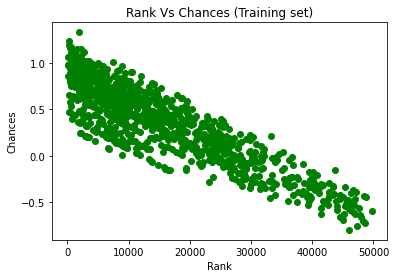

In [53]:
#plt.scatter(train_x['Rank'], train_y, color = "red")
plt.scatter(train_x['Rank'], reg.predict(train_x), color = "green")
plt.title("Rank Vs Chances (Training set)")
plt.xlabel("Rank")
plt.ylabel("Chances")
plt.show()
#plt.scatter(train_x['Rank'],train_y)

In [54]:
from sklearn.tree import DecisionTreeRegressor
reg1= DecisionTreeRegressor(random_state = 0)
reg1.fit(X, Y)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=0, splitter='best')

In [55]:
# calc the accuracy of the model
from sklearn.metrics import r2_score
score=r2_score(test_y,reg1.predict(test_x))
score

0.9999999965103351

In [56]:
reg1.predict([[8000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1]])

array([0.73470779])